## 1. Motivation

### What is our dataset?

We used the **NYPD Shooting Incident Data (Historic)** dataset, which contains detailed records of all reported shooting incidents in New York City from **2006 - 2024**. Each entry includes demographic information about both the victim and the perpetrator (such as age and sex), as well as details on location, time, and borough.

The dataset is publicly available through [NYC Open Data](https://data.cityofnewyork.us/Public-Safety/NYPD-Shooting-Incident-Data-Historic-/833y-fsy8) and is regularly updated, making it one of the most comprehensive open government crime datasets in the U.S.

### Why did we choose this dataset?

Gun violence is a persistent public safety issue in New York City. According to the [NYC Office to Prevent Gun Violence](https://criminaljustice.cityofnewyork.us/programs/office-to-prevent-gun-violence/), a small number of neighborhoods account for roughly 50% of all shooting incidents in the city. This dataset allows us to explore the characteristics of those incidents in depth, not only by location, but by age, gender, and time of occurrence.

At the same time, New York’s gun violence trends reflect a broader nationwide crisis. As of 2024, there have been **16,844 gun-related deaths** (excluding suicides) and **31,757 injuries** in the United States, according to the [Gun Violence Archive (2024)](https://www.gunviolencearchive.org/past-tolls). This concerning scale underscores the urgency of understanding and addressing gun violence not only at the local level, but as a national public health issue. These patterns are not random; they’re shaped by demographic, social, and temporal factors, all of which are captured in this dataset.

We chose this dataset because:

- **Scope and scale**: Spanning nearly two decades and more than 29,000 incidents.
- **Demographic granularity**: Contains both perpetrator and victim **age and gender**, allowing for detailed subgroup analysis.
- **Temporal resolution**: Includes both **date and time**, enabling hourly pattern detection.
- **Geospatial coverage**: Borough-level and coordinate data enable spatial mapping and neighborhood-level analysis.

### What was our goal for the end-user experience?

Our goal is to build a **public-facing website** that not only presents these patterns but also encourages critical reflection about **how violence unfolds, who it affects, when it happens, and where it concentrates**.

We want to:
- Shed light on **demographic patterns of violence**, with a focus on exploring potential difference by age, gender, and time of day, for instance, whether young males account for the majority of shooting incidents.
- Provide a user-friendly entry point for understanding how data can clarify social issues.
- Contribute to the broader conversation about **gun violence in the U.S.**, using NYC as a powerful, data-rich case study.

By combining interactive visualizations with narrative guidance, we hope to make these insights accessible to a non-technical audience while maintaining analytical depth.




## Basic Stats and Preprocessing

The NYPD Shooting Incident dataset is relatively clean and well-structured, enabling us to explore patterns without extensive cleaning. However, to sharpen the clarity and relevance of our analysis, we made a few targeted decisions around filtering and formatting.

### Filtering and Preparation

We describe below how we prepared the key variables used in our visualizations and what motivated each choice:

- **`PERP_SEX` and `VIC_SEX` (Perpetrator/Victim Gender)**  
  We focused on entries with clearly labeled gender values: `'M'` or `'F'`. Entries marked `'UNKNOWN'`, `'U'`, blanks, or nulls were excluded to reduce ambiguity and enable meaningful gender-based comparisons.

- **`PERP_AGE_GROUP` and `VIC_AGE_GROUP` (Perpetrator/Victim Age)**  
  The dataset contains pre-binned age groups (`'<18'`, `'18-24'`, `'25-44'`, `'65+'`). We preserved these bins and excluded rare or clearly misentered values (e.g., `'1028'`, `'224'`, `'940'`) to ensure the analysis reflected true age demographics.

- **`OCCUR_TIME` (Incident Time)**  
  Originally stored as string-formatted times, this column was parsed into hour-of-day integers (0–23) to allow us to study temporal trends across 24-hour periods.

- **`BORO` (Borough)**  
  This column was already clean, consistently containing one of NYC’s five boroughs (`'Bronx'`, `'Brooklyn'`, `'Manhattan'`, `'Queens'`, `'Staten Island'`). No additional filtering was required.


- **`Latitude` and `Longitude`**  
  Entries were filtered to only include plausible NYC coordinates: Latitude between **40.49** and **40.92**, Longitude between **-74.27** and **-73.69**. These bounds were based on official NYC administrative geography sources, including [NYC Planning's Georeferenced Zoning Maps Metadata](https://www.nyc.gov/assets/planning/download/pdf/data-maps/open-data/georeferenced-zmaps_metadata.pdf).


### Dataset Stats
To better understand the structure and quality of the dataset, we examined the completeness and variability of the most relevant columns. The table below summarizes these variables, including how many valid entries each has, how much data is missing, unique values and examples of the values we encountered.


| **Variable**            | **Count** | **Missing (%)** | **Unique Values** | **Example Values / Range**             |
|-------------------------|-----------|------------------|-------------------|----------------------------------------|
| `OCCUR_DATE`            | 29,744  | 0.0%             | 6,431            | 2006-01-01 → 2024-12-31                |
| `OCCUR_TIME`            | 29,744    | 0.0%           | 1,440             | 00:00 – 23:59 (converted to hour)      |
| `PERP_SEX`              | 17,306    | 41.8%            | 5                 | M, F, U, (null), (blanks)               |
| `PERP_AGE_GROUP`        | 15,619    | 47,5%          | 12                | 18-24', '25-44', 'UNKNOWN', '<18', '(null)', '45-64', '65+', '1028', '1020', '940', '224', '2021'                   |
| `VIC_SEX`               | 29,732   | 0.0%             | 3                 | M, F, U                |
| `VIC_AGE_GROUP`         | 29,675    | 0.2%             | 7                 | '25-44', '18-24', '<18', '45-64', '65+', 'UNKNOWN', '1022'                 |
| `Latitude` / `Longitude`| 29,647   | 0.3%              | 14,048         |    Latitude: 40.49 - 40.92, Longitude: (-74.27) - (-73.69)|
| `BORO`                  | 29,744    | 0.0%             | 5                 | Bronx, Brooklyn, Queens, Manhattan, Staten Island  |




## 3. Data Analysis

### Describing our data analysis and explain what we've learned about the dataset.

We structured our analysis around key demographic, temporal, and spatial dimensions captured in the dataset. Our process focused on filtering, grouping, and visualizing the data to reveal patterns in who gets shot, who does the shooting, when it happens, and where violence tends to concentrate.

Below are the main findings, supported by our exploratory visualizations:

### Data Analysis

1. **Based on Figure 1 (Gender, Role, and Age Group Breakdown)**  
   The majority of shootings in NYC involve **male perpetrators and male victims**, with male-perpetrated incidents dramatically outnumbering those involving female perpetrators. The visualization also reveals an **age concentration among 18–44 year-olds**, particularly among male perpetrators and victims. This breakdown reinforces the demographic focus of gun violence and helps clarify the scale of gender and age disparities within the dataset.

2. **Based on Figure 2 (Gender Heatmap: Who Shoots Whom?)**  
   The majority of shootings involve **male perpetrators targeting male victims**. Male-on-female and female-on-male incidents are comparatively rare, and female-on-female is nearly negligible.

3. **Based on Figure 3 (Age Group Heatmap)**  
   The second heatmap explores age group dynamics in NYC shootings. We see that incidents most frequently occur **within the same age group**, especially among individuals aged **18–24** and **25–44**. Both perpetrator and victim are often drawn from the same demographic, suggesting that gun violence in NYC frequently involves individuals who are similarly aged. This reflects a pattern of **age-aligned violence**, where social proximity may play a role in conflict escalation.

4. **Based on Figure 4 (Shootings by Hour of Day, Faceted by Gender and Age Group)**  
   **Young males (18–24)** are the most active group in terms of shooting incidents, showing a clear spike between **8 PM and 2 AM**. By contrast, **female-involved incidents** are less frequent and more evenly distributed throughout the day.

5. **Based on Figure 5 (Shootings by Hour of Day, Split by Gender and Age Group)**  
   We see that **male shooters aged 18–24 and 25–44** are most active **during the late evening and early morning hours**, with a steady rise in shootings starting around **6 PM and peaking around midnight**. In contrast, **female shooters** are relatively few and show no clear hourly pattern. This split highlights how **gender and age influence the daily rhythm** of violence.

6. **Based on Figure 8 (Yearly Shooting Trend)**  
   Shooting incidents **declined significantly during the 2010s**, with a notable drop from 2011 to 2019. However, 2020 marks a **clear inflection point**, with incidents spiking sharply during the onset of the COVID-19 pandemic. The vertical line and label reinforce this shift. This shift aligns with broader reporting on increased gun violence during this period ([New York Times, 2021](https://www.nytimes.com/2021/05/14/nyregion/shootings-nyc-covid.html)).
   The **LOWESS trend line** helps smooth annual variability and emphasizes the overall trajectory: a long decline disrupted by a pandemic-driven surge.
   
7. **Based on Figure 7 (Seasonal Shooting Trends by Month and Gender)**  
   For **male shooters**, especially those aged **18–24** and **25–44**, **July marks the peak month** for gun violence, followed by a slight decline in August. The pattern is consistent across most male age groups, with a noticeable spike in summer. In contrast, **female shooter data shows less seasonal variation**, though individuals aged **25–44** appear to peak in **June**, with some sustained activity in July and August. These trends reflect a potential **seasonal rhythm to violence**, especially among younger males.

8. **Based on Figure 8 (NYC Shootings by Borough)**  
   We see that **Brooklyn and the Bronx** experience the highest number of shootings, followed by Queens and Manhattan. **Staten Island** shows far fewer incidents. This reinforces existing knowledge about spatial disparities in urban violence.

9. **Based on Figure 9 (NYC Shooting Heatmap by Hour)**  
   The spatial heatmap shows that shootings are heavily concentrated in specific neighborhoods of Brooklyn and the Bronx. In Brooklyn, in particular, the density clusters suggest repeated activity within a focused geographic area, especially around late-night hours. This reinforces earlier findings that gun violence tends to be not only temporally but also spatially concentrated, pointing to persistent high-risk zones within the city.

10. **Based on Figure 10 (Yearly Shooting Distribution by Perpetrator, Age group, and Borough)**  
Young adults, particularly those aged **18–24 and 25–44**, are consistently the most involved in shootings across all five boroughs. These age groups show both the **highest medians** and the **widest distributions** in yearly shooting incidents. While patterns are relatively consistent across boroughs, **Brooklyn and the Bronx** show especially high upper ranges, indicating years with unusually elevated activity. In contrast, the **<18 and 65+** age groups have much **lower medians** and **tighter interquartile ranges**, reinforcing their smaller role in the broader pattern of gun violence in NYC.

11. **Based on Figure 11 (Machine Learning Forecast)**  
We used a **Ridge Regression** model to forecast monthly shooting incidents in NYC, drawing on historical data from 2007 onward (with lag features based on 2006 data). The model learns from the **temporal structure** in the data, including **seasonal cycles and recurring trends**, and achieves a root mean squared error (RMSE) of **10.94** on the test set.
While forecasting is not the primary aim of our project, this figure illustrates how **predictive modeling can complement social data analysis**. It adds a forward-looking layer, suggesting that past patterns, though shaped by social context, can also inform future expectations. This experiment demonstrates that machine learning can be a useful **supporting tool** in public policy or prevention planning discussions, especially when used transparently and cautiously.

12. **Based on Figure 12 (When and Where are male perpetrators under 45 most Active?)**  
   Shootings involving male perpetrators under 45 are heavily concentrated in the late evening and nighttime hours. This pattern holds most strongly in the Bronx and Brooklyn, where activity intensifies between 8 PM and 2 AM. In contrast, Queens, Manhattan, and Staten Island show lower incident counts overall, with a flatter distribution across hours. These temporal trends highlight the rhythmic, after-dark nature of most gun violence involving this demographic in NYC.

These visual patterns collectively highlight a central insight:  
> **Gun violence in NYC follows structured demographic and temporal patterns, it is not random.**





## 4. Genre

### Which genre of data story did we use?

We chose the **Magazine Style** genre for our project. This genre is well-suited for presenting complex social issues like gun violence in an accessible, engaging, and visually appealing format. The magazine style allows us to combine narrative text, striking visualizations, and interactive elements in a curated sequence, encouraging users to scroll and engage with the content at their own pace.

This format supports our goal of reaching a broad audience, including non-technical users, by making the findings easy to understand while still preserving analytical depth. The structure promotes exploration, but with narrative guidance, helping users follow a coherent story about who is involved in gun violence in NYC, when it happens, and where. We grounded our visual storytelling approach in the framework outlined by Segel and Heer (2010), who identify key tools across visual narrative and narrative structure ([Segel & Heer, 2010](http://vis.stanford.edu/files/2010-Narrative-InfoVis.pdf)).


### Which tools did we use from each of the 3 categories of Visual Narrative (Figure 7 in Segel and Heer)?

**Visual Structuring**  
- **Consistent Visual Platform**: All figures use a shared palette, font style, and spacing. This consistency allows viewers to easily interpret each new chart without reorienting themselves.  
- **Progressive Disclosure**: Visualizations are introduced in a carefully curated sequence, with complexity gradually increasing, from basic gender breakdowns to multivariate analysis (e.g., space and time). This lowers cognitive load and guides attention.

**Highlighting**  
- **Feature Distinction**: Color encodings consistently distinguish categories such as age group or borough. Contrasts between reds, oranges, and purples help emphasize key dimensions like young male activity.  
- **Captions and Callouts**: Narrative text and figure titles explicitly describe key insights (e.g., “young males most active late at night”), drawing the viewer’s eye to important relationships.

**Transition Guidance**  
- **Continuity**: Visual forms repeat across related charts (e.g., boxplots, heatmaps), reinforcing thematic links. Layout and sequencing support smooth cognitive transitions as users scroll through the story.

### Which tools did we use from each of the 3 categories of Narrative Structure (Figure 7 in Segel and Heer)?

**Ordering**  
- **Linear**: The viewer is led through a defined narrative arc, starting with basic demographics (who), progressing through spatial and temporal patterns (where and when), and ending with comparative reflections.

**Interactivity**  
- **Hover Highlighting / Details**: In Bokeh visualizations, viewers can hover to explore additional context (e.g., number of incidents by age group).  
- **Filtering / Selection**: Some plots (e.g., stacked bar charts) allow interactive toggling of age categories, enabling audience-driven focus.

**Messaging**  
- **Captions / Headlines**: Each figure is accompanied by brief, pointed titles and explanations that convey the main takeaway.  
- **Introductory Text**: Every section includes narrative scaffolding to set expectations, making the analytical story accessible to non-experts.



## 5. Visualizations

To tell a clear and compelling story about gun violence in NYC, we selected a series of visualizations that emphasize the most important dimensions of the issue: **who is involved, when it happens, and where it concentrates**. Each visualization was chosen for its clarity, relevance, and ability to guide a non-technical audience through complex patterns. Below, we describe why each figure was created and how it supports the overall narrative.

### Who?

**Figure 1: Incidents by Gender, Role, and Age Group**  
_An interactive Bokeh bar chart showing the number of shooting incidents by gender and role._  
This introductory visualization reveals the strong gender imbalance in NYC shooting incidents. It combines clarity with interactivity, allowing viewers to explore age group composition within each bar. The design supports a quick understanding of broad patterns while laying the groundwork for more granular visualizations later in the analysis.

**Figure 2: Who Shoots Whom? (By Gender)**  
_A heatmap showing combinations of perpetrator and victim gender._  
This chart adds a layer of complexity to the gender analysis by showing relational patterns. The matrix format helps reveal directional trends (e.g., male-on-male violence) and supports the narrative that most shootings occur within, not across, gender lines.

**Figure 3: Perpetrator vs. Victim Age Group**  
_A heatmap comparing shooter and victim age group combinations._  
This visualization extends our demographic focus to age. It maintains the same grid format as Figure 2 for consistency, making it easy for the audience to shift their attention from gender patterns to age alignment while comparing across dimensions.

**Figure 4: Full Demographic Heatmap (Gender + Age)**  
_An extended heatmap showing all shooter-victim combinations across gender and age._  
This matrix combines gender and age into a single, rich visualization. It allows for fine-grained demographic exploration while reinforcing the core finding: violence is heavily concentrated among young males. Its detailed format is particularly useful for users who want to investigate subgroup dynamics.

### When?

**Figure 5: Hourly Shootings by Gender and Age**  
_A faceted line chart showing hourly shooting counts split by gender and age group._  
We chose this visualization to explore daily rhythms of violence. The split panels let us isolate gender-based differences, while line charts make the hourly flow intuitive. This figure helps us visually narrate when shootings tend to happen and how that timing varies across groups.

**Figure 6: NYC Shooting Incidents by Year (2006–2024)**  
_A bar chart showing annual totals of shooting incidents, annotated with a trend line and a COVID-19 reference marker._  
This explanatory visualization uses a **time-series bar chart** combined with a smoothed trend line to illustrate long-term patterns in gun violence. The **annotation for COVID-19** makes the spike in 2020 immediately interpretable. Labels on each bar enhance clarity and accessibility. This figure establishes the historical baseline for understanding patterns of gun violence and helps contextualize the more detailed spatial and demographic analyses that follow.


**Figure 7: Seasonal Patterns in Shootings by Gender and Age**  
_An interactive line chart showing monthly trends split by age and gender._  
This figure explores seasonal variation and allows users to toggle across groups. Its interactivity encourages user engagement, while the repeated structure supports comparisons across genders and age brackets, helping viewers see who is most active, and when.

### Where?

**Figure 8: Shooting Density by Borough**  
_A choropleth map of total incidents per borough._  
This spatial visualization provides a macro-level view of geographic concentration. We use a choropleth because it clearly communicates borough-level disparities and serves as a springboard into more granular spatial exploration.

**Figure 9: Animated Hourly Shooting Density**  
_A time-animated heatmap showing shooting activity by hour of day._  
This dynamic map shows how gun violence shifts through space and time. It was chosen to offer an immediate visual sense of how active hotspots form and fade throughout the day. This supports the story’s temporal dimension while tying it to place.

**Figure 10: Yearly Shooting Distribution by Perpetrator, Age Group, and Borough**  
_A series of boxplots showing the distribution of yearly shootings by age group across NYC boroughs._  
Boxplots are used to visualize both **central tendencies** and **variability**, including the **median, interquartile range, and outliers**. This design helps compare the consistency and intensity of age-related gun violence across boroughs. The longer “whiskers” in boroughs like Brooklyn and the Bronx reflect years of **heightened volatility**, while shorter boxes in groups like **65+** suggest relative stability and infrequency. The figure supports a nuanced spatial-demographic understanding of how age intersects with geographic gun violence trends.

### Machine Learning


**Figure 11: Forecasting Future Shootings with Ridge Regression**
_A time-series line chart using Ridge Regression to predict monthly shootings based on historical trends._

This visualization illustrates the predictive power of time-series modeling for gun violence. The black line shows observed monthly shooting counts from early 2007 to 2023, while the red and blue lines compare predicted and actual values for the final 12 months (2024). Although the first year of data (2006) was essential to construct lag-based predictors, it is not directly plotted due to preprocessing constraints.
The chart provides a grounded, forward-looking perspective: while the model is intentionally simple, its forecast reinforces the idea that gun violence follows structural patterns, such as seasonality and persistence, that data science can help uncover. Rather than focusing heavily on forecasting, this figure acts as a conceptual bridge between historical analysis and future implications.

### Conclusion Figure

**Figure 12: When and Where Are Male Perpetrators Under 45 Most Active?**  
_A heatmap showing the distribution of shootings by hour of day and borough._  
This interactive heatmap captures temporal intensity and spatial variation across NYC. Each row represents one hour of the day, while color saturation encodes shooting counts across boroughs. The format enables quick pattern recognition,particularly the nocturnal spike in the Bronx and Brooklyn, and supports filtering or hover interactions for deeper exploration.








## 6. Discussion

### What went well?

Our project successfully revealed clear and interpretable patterns in NYC shooting data across **demographic**, **temporal**, and **spatial** dimensions. The visualizations aligned with our narrative goals and were accessible to non-technical audiences, especially in highlighting the overrepresentation of young males and the timing of late-night incidents.

We implemented a lightweight **machine learning model** to forecast future trends, adding a predictive layer to our primarily exploratory approach. Several interactive visualizations allowed users to filter and explore the data dynamically, enhancing both engagement and insight.

This project reflects the core objectives of the course [02806: Social Data Analysis and Visualization](https://kurser.dtu.dk/course/2025-2026/02806). We applied state-of-the-art tools introduced in the course to explore and analyze a real-world, multidimensional dataset, focusing on uncovering interpretable patterns across temporal, spatial, and demographic dimensions. While we did not perform extensive data cleaning, our approach emphasized the effective use of modern analytical and visualization libraries to support dynamic exploration, lightweight modeling, and accessible communication of key insights. This work demonstrates our ability to create explanatory and narrative visualizations, aligning with the course's emphasis on using data-driven storytelling to convey insights from complex social data.

### What is still missing? What could be improved?

Although our analysis was successful overall, several aspects could be further developed:

- **Deeper modeling**: We only implemented a single Ridge Regression model for forecasting. There was potential to explore other algorithms (e.g., time-series models, classification models) or incorporate more ML-driven visuals to show risk patterns or spatial predictions.
- **Limited context**: The dataset lacked socioeconomic or behavioral variables that might explain why certain patterns emerge (e.g., poverty, housing, peer influence). While our analysis remained descriptive, incorporating contextual research or references could deepen understanding of the observed trends.
- **Geographic resolution**: Most maps focused on the borough level or generalized point clusters. More detailed neighborhood or precinct-level mapping could strengthen place-based conclusions.
- **More advanced interactivity**: Some visualizations (e.g., time trends) are interactive, while others remain static. Creating more uniform interactivity could support better user exploration across all figures.

### Why?

Many of these limitations were related to **scope and feasibility**. Incorporating more advanced machine learning analyses would have required significant time to validate models and ensure responsible interpretation. Additionally, investigating *why* certain patterns emerged was outside the scope of our research, which prioritized identifying and analyzing patterns over explaining their causes. In future iterations, we hope to deepen both the modeling and the user experience, particularly by integrating **more interactive elements and predictive features** that enhance the analytical narrative. While investigating the causes behind the observed patterns was beyond our current scope, it could be a valuable direction for future research.




### 7. Contributions

- **Áróra (s242693)** led the design and development of the final website, making the narrative and visuals accessible to a broader audience.
- **Nanna (s243949)** took the lead on implementing the visualizations and coding the core elements of the analysis pipeline.
- **Tinna (s242744)** was primarily responsible for writing and structuring the Jupyter Notebook, ensuring the methods and insights were clearly explained.
- The data story text was collaboratively written and edited by all three members.


## 8. References

- New York City Police Department. (n.d.). *NYPD Shooting Incident Data (Historic)*. Retrieved from [https://data.cityofnewyork.us/Public-Safety/NYPD-Shooting-Incident-Data-Historic-/833y-fsy8](https://data.cityofnewyork.us/Public-Safety/NYPD-Shooting-Incident-Data-Historic-/833y-fsy8)

- Gun Violence Archive. (n.d.). *Past Tolls*. Retrieved from [https://www.gunviolencearchive.org/past-tolls](https://www.gunviolencearchive.org/past-tolls)

- Mayor’s Office of Criminal Justice. (n.d.). *Office to Prevent Gun Violence*. Retrieved from [https://criminaljustice.cityofnewyork.us/programs/office-to-prevent-gun-violence/](https://criminaljustice.cityofnewyork.us/programs/office-to-prevent-gun-violence/)

- NYC Department of City Planning. (n.d.). *Georeferenced NYC Map Data*. Retrieved from [https://www.nyc.gov/assets/planning/download/pdf/data-maps/open-data/georeferenced-zmaps_metadata.pdf](https://www.nyc.gov/assets/planning/download/pdf/data-maps/open-data/georeferenced-zmaps_metadata.pdf)

- Hauser, C. (2021, May 14). *Shootings Spiked in NYC During the Pandemic*. The New York Times. Retrieved from [https://www.nytimes.com/2021/05/14/nyregion/shootings-nyc-covid.html](https://www.nytimes.com/2021/05/14/nyregion/shootings-nyc-covid.html)

- Technical University of Denmark. (2025-2026). *02806: Social Data Analysis and Visualization*. Retrieved from [https://kurser.dtu.dk/course/2025-2026/02806](https://kurser.dtu.dk/course/2025-2026/02806)

- Segel, E., & Heer, J. (2010). *Narrative Visualization: Telling Stories with Data*. IEEE Transactions on Visualization and Computer Graphics, 16(6), 1139–1148. Retrieved from [http://vis.stanford.edu/files/2010-Narrative-InfoVis.pdf](http://vis.stanford.edu/files/2010-Narrative-InfoVis.pdf)


## Coding

### Import Dataset

In [88]:
import pandas as pd

# Load the dataset using full path
file_path = "C:/Users/Tinna/Desktop/Python/NYPD_Shooting_Incident_Data__Historic_.csv"
df = pd.read_csv(file_path)

# Preview the data
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (29744, 21)


INCIDENT_KEY  OCCUR_DATE OCCUR_TIME      BORO LOC_OF_OCCUR_DESC  PRECINCT  \
0     231974218  08/09/2021   01:06:00     BRONX               NaN        40   
1     177934247  04/07/2018   19:48:00  BROOKLYN               NaN        79   
2     255028563  12/02/2022   22:57:00     BRONX           OUTSIDE        47   
3      25384540  11/19/2006   01:50:00  BROOKLYN               NaN        66   
4      72616285  05/09/2010   01:58:00     BRONX               NaN        46   

   JURISDICTION_CODE LOC_CLASSFCTN_DESC            LOCATION_DESC  \
0                0.0                NaN                      NaN   
1                0.0                NaN                      NaN   
2                0.0             STREET           GROCERY/BODEGA   
3                0.0                NaN                PVT HOUSE   
4                0.0                NaN  MULTI DWELL - APT BUILD   

   STATISTICAL_MURDER_FLAG  ... PERP_SEX       PERP_RACE VIC_AGE_GROUP  \
0                    False  ...      NaN             NaN         18-24   
1                     True  ...        M  WHITE HISPANIC         25-44   
2                    False  ...   (null)          (null)         25-44   
3                     True  ...        U         UNKNOWN         18-24   
4                     True  ...        M           BLACK           <18   

  VIC_SEX VIC_RACE               X_COORD_CD              Y_COORD_CD  \
0       M    BLACK                  1006343                  234270   
1       M    BLACK  1000082.937500000000000  189064.671875000000000   
2       M    BLACK                  1020691                  257125   
3       M    BLACK   985107.312500000000000  173349.796875000000000   
4       F    BLACK  1009853.500000000000000  247502.562500000000000   

    Latitude  Longitude                                        Lon_Lat  
0  40.809673 -73.920193   POINT (-73.92019278899994 40.80967347200004)  
1  40.685610 -73.942913  POINT (-73.94291302299996 40.685609672000055)  
2  40.872349 -73.868233                   POINT (-73.868233 40.872349)  
3  40.642490 -73.996912  POINT (-73.99691224999998 40.642489932000046)  
4  40.845984 -73.907461   POINT (-73.90746098599993 40.84598358900007)  

[5 rows x 21 columns]

### Data Statistics

In [89]:
# Clean and prepare the BORO column
boro_clean = df['BORO'].dropna().astype(str).str.strip().str.title()

# Count of valid entries
valid_count = boro_clean.isin(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']).sum()

# Total rows
total_rows = len(df)

# Missing or unexpected values
invalid_count = total_rows - valid_count
missing_pct = (invalid_count / total_rows) * 100

# Number of unique values
unique_values = boro_clean.nunique()

# Example values
example_values = boro_clean.value_counts().index.tolist()

# Output
print(f"Valid boro count: {valid_count}")
print(f"Missing or invalid: {invalid_count} ({missing_pct:.1f}%)")
print(f"Unique values: {unique_values}")
print(f"Example values: {example_values}")


Valid boro count: 29744
Missing or invalid: 0 (0.0%)
Unique values: 5
Example values: ['Brooklyn', 'Bronx', 'Queens', 'Manhattan', 'Staten Island']


In [90]:
# OCCUR_DATE stats
date_series = df['OCCUR_DATE']

# Count of non-null entries
date_count = date_series.notna().sum()

# Missing percentage
missing_pct = date_series.isna().mean() * 100

# Unique values
unique_dates = date_series.nunique()

# Date range (min and max)
date_min = pd.to_datetime(date_series).min()
date_max = pd.to_datetime(date_series).max()

print(f"Count: {date_count}")
print(f"Missing: {missing_pct:.1f}%")
print(f"Unique Values: {unique_dates}")
print(f"Date Range: {date_min.date()} → {date_max.date()}")


Count: 29744
Missing: 0.0%
Unique Values: 6431
Date Range: 2006-01-01 → 2024-12-31


In [91]:
# OCCUR_TIME stats
time_series = df['OCCUR_TIME']

# Convert to datetime if needed
df['OCCUR_TIME'] = pd.to_datetime(df['OCCUR_TIME'], format='%H:%M:%S', errors='coerce')

# Reassign for analysis
time_series = df['OCCUR_TIME']

# Count of valid times
valid_time_count = time_series.notna().sum()

# Missing percentage
missing_pct = time_series.isna().mean() * 100

# Unique values (times)
unique_times = time_series.nunique()

# Time range (earliest and latest time)
time_min = time_series.min().time()
time_max = time_series.max().time()

print(f"Count: {valid_time_count}")
print(f"Missing: {missing_pct:.1f}%")
print(f"Unique Values: {unique_times}")
print(f"Time Range: {time_min} → {time_max}")


Count: 29744
Missing: 0.0%
Unique Values: 1424
Time Range: 00:00:00 → 23:59:00


In [92]:
# Count of valid entries (M or F)
valid_count = df['PERP_SEX'].isin(['M', 'F']).sum()

# Total rows in dataset
total_rows = len(df)

# Missing or ambiguous entries
invalid_count = total_rows - valid_count
missing_pct = (invalid_count / total_rows) * 100

# Unique values (cleaned for inspection)
example_values = df['PERP_SEX'].dropna().astype(str).str.strip().str.upper().value_counts().index.tolist()


# Output
print(f"Valid M/F count: {valid_count}")
print(f"Missing or invalid: {invalid_count} ({missing_pct:.1f}%)")
print(f"Example values: {example_values}")


Valid M/F count: 17306
Missing or invalid: 12438 (41.8%)
Example values: ['M', '(NULL)', 'U', 'F']


In [93]:
# Define valid age groups
valid_ages = ['<18', '18-24', '25-44', '45-64', '65+']

# Count valid entries
valid_count = df['PERP_AGE_GROUP'].isin(valid_ages).sum()

# Total rows
total_rows = len(df)

# Count and percentage of missing or ambiguous values
invalid_count = total_rows - valid_count
missing_pct = (invalid_count / total_rows) * 100

# Unique values for inspection
example_values = df['PERP_AGE_GROUP'].dropna().astype(str).str.strip().value_counts().index.tolist()

unique_values = df['PERP_AGE_GROUP'].dropna().astype(str).str.strip().nunique()
print(f"Number of unique values: {unique_values}")


# Output
print(f"Valid age group count: {valid_count}")
print(f"Missing or invalid: {invalid_count} ({missing_pct:.1f}%)")
print(f"Example values: {example_values}")


Number of unique values: 12
Valid age group count: 15619
Missing or invalid: 14125 (47.5%)
Example values: ['18-24', '25-44', 'UNKNOWN', '<18', '(null)', '45-64', '65+', '1028', '1020', '940', '224', '2021']


In [94]:
# Clean VIC_SEX
vic_sex_clean = df['VIC_SEX'].dropna().astype(str).str.strip().str.upper()

# Count of valid entries (M or F)
valid_count = vic_sex_clean.isin(['M', 'F']).sum()

# Total rows
total_rows = len(df)

# Count and percentage of missing or ambiguous entries
invalid_count = total_rows - valid_count
missing_pct = (invalid_count / total_rows) * 100

# Unique value count
unique_values = vic_sex_clean.nunique()

# Example values
example_values = vic_sex_clean.value_counts().index.tolist()

# Output
print(f"Valid M/F count: {valid_count}")
print(f"Missing or invalid: {invalid_count} ({missing_pct:.1f}%)")
print(f"Unique values: {unique_values}")
print(f"Example values: {example_values}")


Valid M/F count: 29732
Missing or invalid: 12 (0.0%)
Unique values: 3
Example values: ['M', 'F', 'U']


In [95]:
# Define valid age groups
valid_ages = ['<18', '18-24', '25-44', '45-64', '65+']

# Clean and prepare the column
vic_age_clean = df['VIC_AGE_GROUP'].dropna().astype(str).str.strip()

# Count of valid values
valid_count = vic_age_clean.isin(valid_ages).sum()

# Total rows in dataset
total_rows = len(df)

# Missing or invalid entries
invalid_count = total_rows - valid_count
missing_pct = (invalid_count / total_rows) * 100

# Number of unique values
unique_values = vic_age_clean.nunique()

# Example values
example_values = vic_age_clean.value_counts().index.tolist()

# Output
print(f"Valid age group count: {valid_count}")
print(f"Missing or invalid: {invalid_count} ({missing_pct:.1f}%)")
print(f"Unique values: {unique_values}")
print(f"Example values: {example_values}")


Valid age group count: 29675
Missing or invalid: 69 (0.2%)
Unique values: 7
Example values: ['25-44', '18-24', '<18', '45-64', '65+', 'UNKNOWN', '1022']


In [96]:
# Define valid NYC bounding box
valid_lat = df['Latitude'].between(40.4, 41.0)
valid_lon = df['Longitude'].between(-74.3, -73.6)

# Combined valid points
valid_coords = valid_lat & valid_lon
valid_count = valid_coords.sum()

# Total rows
total_rows = len(df)

# Invalid or missing coordinates
invalid_count = total_rows - valid_count
missing_pct = (invalid_count / total_rows) * 100

# Unique coordinate pairs
coord_pairs = df[['Latitude', 'Longitude']].dropna()
unique_pairs = coord_pairs.drop_duplicates().shape[0]

# Output
print(f"Valid lat/lon rows (in NYC bounds): {valid_count}")
print(f"Missing or invalid: {invalid_count} ({missing_pct:.1f}%)")
print(f"Unique coordinate pairs: {unique_pairs}")


Valid lat/lon rows (in NYC bounds): 29647
Missing or invalid: 97 (0.3%)
Unique coordinate pairs: 14048


### Figure 1

In [97]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource

# Define valid age groups
age_order = ['<18', '18-24', '25-44', '45-64', '65+']

# Process Victim data
victims = df[['VIC_SEX', 'VIC_AGE_GROUP']].copy()
victims = victims[victims['VIC_AGE_GROUP'].isin(age_order)]
victims['Role'] = 'Victim'
victims.rename(columns={'VIC_SEX': 'Gender', 'VIC_AGE_GROUP': 'Age_Group'}, inplace=True)

# Process Perpetrator data
perpetrators = df[['PERP_SEX', 'PERP_AGE_GROUP']].copy()
perpetrators = perpetrators[perpetrators['PERP_AGE_GROUP'].isin(age_order)]
perpetrators['Role'] = 'Perpetrator'
perpetrators.rename(columns={'PERP_SEX': 'Gender', 'PERP_AGE_GROUP': 'Age_Group'}, inplace=True)

# Combine and clean
combined = pd.concat([victims, perpetrators], ignore_index=True)
combined = combined[combined['Gender'].isin(['M', 'F'])]
combined['x'] = combined['Gender'].map({'M': 'Male', 'F': 'Female'}) + ' - ' + combined['Role']

# Group and pivot for stacked bar chart
grouped = combined.groupby(['x', 'Age_Group']).size().unstack(fill_value=0).reset_index()
grouped = grouped[['x'] + age_order]

colors = ['#fff2e6', '#ffd699', '#ffa64d', '#ff5e00', '#990000']



# Prepare Bokeh plot
output_notebook()
source = ColumnDataSource(grouped)

p = figure(x_range=grouped['x'], height=500, width=850,
           title="Incidents by Gender, Role, and Age Group",
           toolbar_location="above",
           tools="hover", tooltips="$name: @$name")

# Add stacked bars
for i, age in enumerate(age_order):
    p.vbar(x='x', top=age, width=0.8, source=source,
           color=colors[i], fill_alpha=0.6,
           legend_label=age, muted_alpha=0.1, name=age)

# Styling
p.y_range.start = 0
p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Gender and Role"
p.yaxis.axis_label = "Number of Incidents (2006–2024)"
p.legend.title = "Age Group"
p.legend.location = "top_left"
p.legend.orientation = "vertical"
p.legend.label_text_font_size = "10pt"
p.legend.title_text_font_size = "11pt"
p.legend.click_policy = "mute"

# Show the plot
show(p)







Loading BokehJS ...

### Figure 2

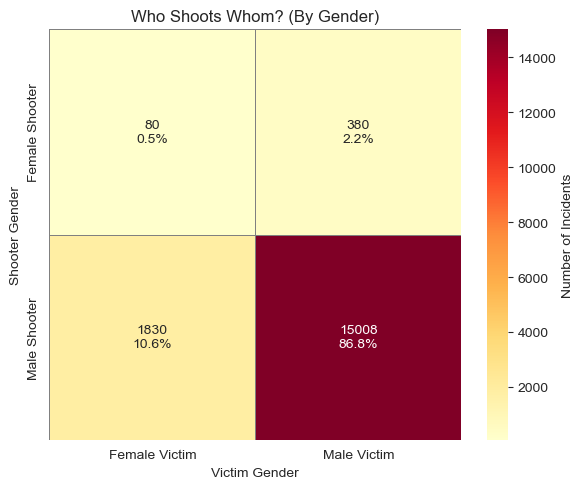

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns


# Filter for valid gender values
df_gender = df[df['PERP_SEX'].isin(['M', 'F']) & df['VIC_SEX'].isin(['M', 'F'])]

# Create 2x2 crosstab: Shooter Gender vs Victim Gender
gender_combo = pd.crosstab(df_gender['PERP_SEX'], df_gender['VIC_SEX'])

# Rename for clarity
gender_combo.index = gender_combo.index.map({'M': 'Male Shooter', 'F': 'Female Shooter'})
gender_combo.columns = gender_combo.columns.map({'M': 'Male Victim', 'F': 'Female Victim'})

# Calculate percentage (in total, for both men and women)
percent_matrix = (gender_combo / gender_combo.values.sum()) * 100

# Combine labels (count and percentage)
labels = gender_combo.astype(str) + "\n" + percent_matrix.round(1).astype(str) + "%"

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(
    gender_combo,
    annot=labels.values,
    fmt='',
    cmap= 'YlOrRd',
    cbar_kws={'label': 'Number of Incidents'},
    linewidths=0.5,
    linecolor='gray'
)
plt.title("Who Shoots Whom? (By Gender)")
plt.xlabel("Victim Gender")
plt.ylabel("Shooter Gender")
plt.tight_layout()
plt.show()




### Figure 3

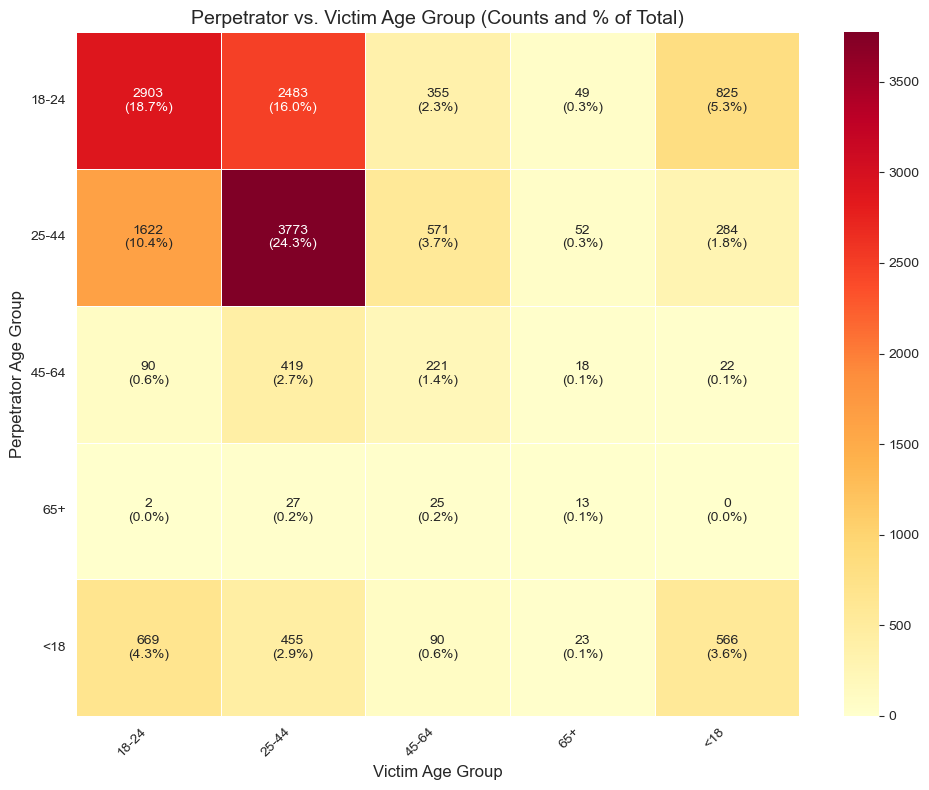

In [99]:
# Filter for valid age groups
valid_ages = ['<18', '18-24', '25-44', '45-64', '65+']
df_age = df[df['PERP_AGE_GROUP'].isin(valid_ages) & df['VIC_AGE_GROUP'].isin(valid_ages)]

# Create cross-tab of raw counts
age_cross = pd.crosstab(df_age['PERP_AGE_GROUP'], df_age['VIC_AGE_GROUP'])

# Calculate percentages
age_percent = age_cross / age_cross.values.sum() * 100

# Create annotation labels: "count (xx.x%)"
annot_labels = age_cross.astype(str) + "\n(" + age_percent.round(1).astype(str) + "%)"

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(age_cross, annot=annot_labels, fmt='', cmap='YlOrRd', linewidths=0.5, linecolor='white')

plt.title("Perpetrator vs. Victim Age Group (Counts and % of Total)", fontsize=14)
plt.xlabel("Victim Age Group", fontsize=12)
plt.ylabel("Perpetrator Age Group", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()




### Figure 4

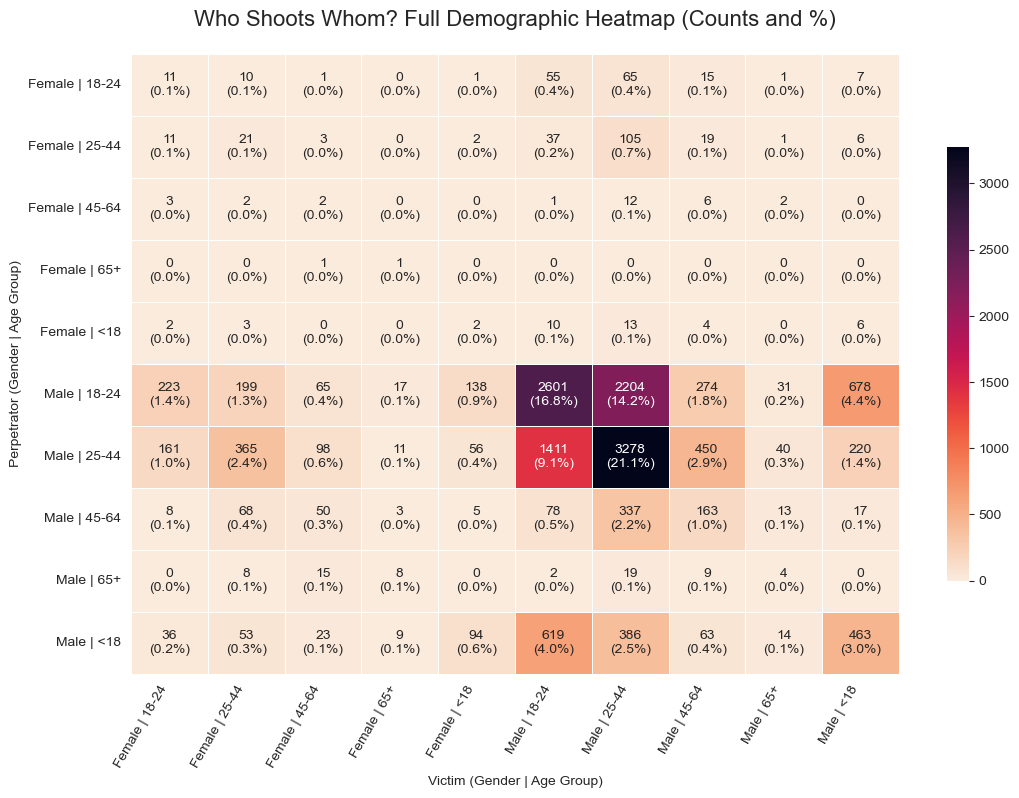

In [100]:
# Filter valid data
valid_ages = ['<18', '18-24', '25-44', '45-64', '65+']
valid_genders = ['M', 'F']

df_filtered = df[
    df['PERP_SEX'].isin(valid_genders) &
    df['VIC_SEX'].isin(valid_genders) &
    df['PERP_AGE_GROUP'].isin(valid_ages) &
    df['VIC_AGE_GROUP'].isin(valid_ages)
].copy()

# Create labels
df_filtered['Shooter Group'] = df_filtered['PERP_SEX'].map({'M': 'Male', 'F': 'Female'}) + " | " + df_filtered['PERP_AGE_GROUP']
df_filtered['Victim Group'] = df_filtered['VIC_SEX'].map({'M': 'Male', 'F': 'Female'}) + " | " + df_filtered['VIC_AGE_GROUP']

# Create matrix
heatmap_matrix = pd.crosstab(df_filtered['Shooter Group'], df_filtered['Victim Group'])

# Compute percentages
percent_matrix = heatmap_matrix / heatmap_matrix.values.sum() * 100

# Combine count and percent
annot_labels = heatmap_matrix.astype(str) + "\n(" + percent_matrix.round(1).astype(str) + "%)"

# Sort labels
heatmap_matrix = heatmap_matrix.reindex(index=sorted(heatmap_matrix.index), columns=sorted(heatmap_matrix.columns))
annot_labels = annot_labels.reindex(index=sorted(annot_labels.index), columns=sorted(annot_labels.columns))

# Plot
fig, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(
    heatmap_matrix,
    annot=annot_labels,
    fmt='',
    cmap='rocket_r',
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    ax=ax
)

# Title and axes
ax.set_title("Who Shoots Whom? Full Demographic Heatmap (Counts and %)", fontsize=16, pad=20)
ax.set_xlabel("Victim (Gender | Age Group)")
ax.set_ylabel("Perpetrator (Gender | Age Group)")

# Tick styling
plt.xticks(rotation=60, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Adjust spacing
plt.subplots_adjust(left=0.35, bottom=0.28, right=0.95, top=0.90)

plt.show()



### Figure 5

In [101]:
import plotly.express as px

#Preprocess data
df['OCCUR_TIME'] = pd.to_datetime(df['OCCUR_TIME'], format='%H:%M:%S', errors='coerce')
df['HOUR'] = df['OCCUR_TIME'].dt.hour

valid_ages = ['<18', '18-24', '25-44', '45-64', '65+']
df_filtered = df[
    df['PERP_SEX'].isin(['M', 'F']) &
    df['PERP_AGE_GROUP'].isin(valid_ages) &
    df['HOUR'].notna()
].copy()

df_filtered['Gender'] = df_filtered['PERP_SEX'].map({'M': 'Male', 'F': 'Female'})
df_filtered['Age Group'] = pd.Categorical(df_filtered['PERP_AGE_GROUP'], categories=valid_ages, ordered=True)

grouped = df_filtered.groupby(['Gender', 'Age Group', 'HOUR']).size().reset_index(name='Shootings')

# Use a contrasting red-to-purple color palette
color_palette = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00']  # ColorBrewer Set1

fig = px.line(
    grouped,
    x='HOUR',
    y='Shootings',
    color='Age Group',
    facet_col='Gender',
    facet_col_spacing=0.1,
    color_discrete_sequence=color_palette,
    title="Shootings by Hour of Day, split by Gender and Age Group",
    labels={'HOUR': 'Hour of Day', 'Shootings': 'Number of Shootings (2006–2024)'}
)

fig.update_layout(
    height=500,
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(family='Arial', size=12, color='#2c2c2c'),
    margin=dict(t=60, l=60, r=60, b=50),
    legend_title_text='Age Group',
    xaxis=dict(dtick=1, showgrid=False, ticks='outside'),
    xaxis2=dict(dtick=1, showgrid=False, ticks='outside'),
    yaxis=dict(showgrid=False, showticklabels=True, ticks='outside'),
    yaxis2=dict(showgrid=False, showticklabels=True, ticks='outside')
)

fig.show()


C:\Users\Tinna\AppData\Local\Temp\ipykernel_17444\2480576726.py:17: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Figure 6

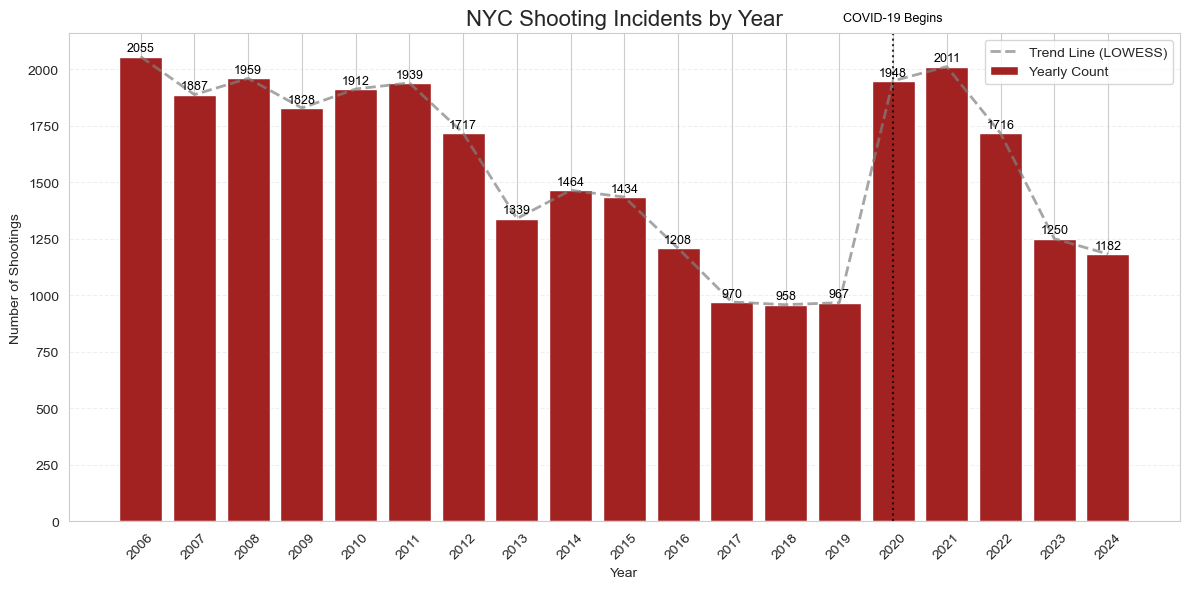

In [102]:
import statsmodels.api as sm

# Prepare data
df['OCCUR_DATE'] = pd.to_datetime(df['OCCUR_DATE'], errors='coerce')
df = df.dropna(subset=['OCCUR_DATE'])
df['YEAR'] = df['OCCUR_DATE'].dt.year
shootings_per_year = df['YEAR'].value_counts().sort_index()

# LOWESS smoothing
lowess = sm.nonparametric.lowess
smoothed = lowess(shootings_per_year.values, shootings_per_year.index, frac=0.2)  # adjust frac for smoothing

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
x_labels = shootings_per_year.index.astype(str)
bars = ax.bar(x_labels, shootings_per_year.values, color='#a22222', label='Yearly Count')

# Plot smoothed line
# ... previous code unchanged

# Plot smoothed line
ax.plot(shootings_per_year.index.astype(str), smoothed[:, 1],
        color='gray', linestyle='--', linewidth=2, alpha=0.7, label='Trend Line (LOWESS)')

# Add vertical line
ax.axvline(x='2020', color='black', linestyle='dotted', linewidth=1.5, alpha=0.8)

# Annotate above the bar chart using axis transform
ax.annotate('COVID-19 Begins',
            xy=('2020', 1.02),  # 2% above the top of the axis
            xycoords=('data', 'axes fraction'),
            ha='center', va='bottom',
            fontsize=9, color='black')

# Add bar labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 10,
            f'{int(height)}', ha='center', va='bottom', fontsize=9, color='black')

# Style
ax.set_title("NYC Shooting Incidents by Year", fontsize=16)
ax.set_xlabel("Year")
ax.set_ylabel("Number of Shootings")
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Figure 7

In [103]:
import plotly.graph_objects as go

# Load and preprocess
df['OCCUR_DATE'] = pd.to_datetime(df['OCCUR_DATE'], errors='coerce')
df = df.dropna(subset=['OCCUR_DATE', 'PERP_SEX', 'PERP_AGE_GROUP'])

# Extract month
df['Month'] = df['OCCUR_DATE'].dt.month_name().str[:3]
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

# Filter valid entries
valid_ages = ['<18', '18-24', '25-44', '45-64', '65+']
df = df[df['PERP_AGE_GROUP'].isin(valid_ages) & df['PERP_SEX'].isin(['M', 'F'])]

# Map gender
df['Gender'] = df['PERP_SEX'].map({'M': 'Male', 'F': 'Female'})

# Group by Month, Gender, Age
grouped = df.groupby(['Month', 'Gender', 'PERP_AGE_GROUP']).size().reset_index(name='Shootings')

# Warm tone color palette
color_map = {
    '<18': '#99000d',     # deep red
    '18-24': '#cb181d',   # red
    '25-44': '#ef3b2c',   # orange-red
    '45-64': '#fb6a4a',   # light orange
    '65+': '#fcae91'      # yellow-orange
}


# Initialize figure
fig = go.Figure()

# Add traces for Male and Female
for gender in ['Male', 'Female']:
    for age in valid_ages:
        subset = grouped[(grouped['Gender'] == gender) & (grouped['PERP_AGE_GROUP'] == age)]
        fig.add_trace(go.Bar(
            x=subset['Month'],
            y=subset['Shootings'],
            name=f"{gender} | {age}",
            marker_color=color_map[age],
            visible=(gender == 'Male')
        ))

# Add traces for All
for age in valid_ages:
    subset = grouped.groupby(['Month', 'PERP_AGE_GROUP']).sum().reset_index()
    subset = subset[subset['PERP_AGE_GROUP'] == age]
    fig.add_trace(go.Bar(
        x=subset['Month'],
        y=subset['Shootings'],
        name=f"All | {age}",
        marker_color=color_map[age],
        visible=False
    ))

# Dropdown logic
n = len(valid_ages)
dropdown_buttons = [
    dict(label='Male',
         method='update',
         args=[{"visible": [True]*n + [False]*n + [False]*n},
               {"title": "Seasonal Shootings: Male"}]),
    dict(label='Female',
         method='update',
         args=[{"visible": [False]*n + [True]*n + [False]*n},
               {"title": "Seasonal Shootings: Female"}]),
    dict(label='All',
         method='update',
         args=[{"visible": [False]*n + [False]*n + [True]*n},
               {"title": "Seasonal Shootings: All"}])
]

# Layout
fig.update_layout(
    barmode='stack',
    title="Seasonal Shootings: Male",
    xaxis_title='Month',
    yaxis_title='Number of Shootings (2006-2024)',
    updatemenus=[dict(
        buttons=dropdown_buttons,
        direction="down",
        pad={"r": 10, "t": 10},
        showactive=True,
        x=0.1,
        xanchor="left",
        y=1.2,
        yanchor="top"
    )],
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(family='Arial', size=13),
    legend_title_text='Age Group'
)

fig.show()


C:\Users\Tinna\AppData\Local\Temp\ipykernel_17444\3996942301.py:21: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Tinna\AppData\Local\Temp\ipykernel_17444\3996942301.py:50: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Tinna\AppData\Local\Temp\ipykernel_17444\3996942301.py:50: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Tinna\AppData\Local\Temp\ipykernel_17444\3996942301.py:50: FutureWarning:

### Figure 8

In [104]:
import plotly.graph_objects as go
import json

# Clean and group the borough data
df_boroughs = df[df['BORO'].notnull()]
borough_counts = df_boroughs['BORO'].value_counts().rename_axis('Borough').reset_index(name='Shootings')
borough_counts['Borough'] = borough_counts['Borough'].replace({
    'BRONX': 'Bronx',
    'BROOKLYN': 'Brooklyn',
    'MANHATTAN': 'Manhattan',
    'QUEENS': 'Queens',
    'STATEN ISLAND': 'Staten Island'
})

# Borough centroid coordinates
borough_coords = {
    "Bronx": [40.8448, -73.8648],
    "Brooklyn": [40.6501, -73.9496],
    "Manhattan": [40.7831, -73.9712],
    "Queens": [40.7282, -73.7949],
    "Staten Island": [40.5795, -74.1502]
}

# Load NYC borough GeoJSON
with open("new-york-city-boroughs.geojson", "r") as f:
    geojson = json.load(f)

# Plot choropleth
fig = px.choropleth_mapbox(
    borough_counts,
    geojson=geojson,
    locations='Borough',
    featureidkey="properties.name",
    color='Shootings',
    color_continuous_scale="Reds",
    mapbox_style="carto-positron",
    zoom=9,
    center={"lat": 40.71, "lon": -73.94},
    opacity=0.7,
    title="NYC Shootings by Borough"
)

# Add text labels at borough centers
fig.add_trace(go.Scattermapbox(
    lat=[borough_coords[b][0] for b in borough_counts['Borough']],
    lon=[borough_coords[b][1] for b in borough_counts['Borough']],
    mode='text',
    text=borough_counts['Borough'],
    textfont=dict(size=14, color='black'),
    showlegend=False
))

fig.update_layout(margin={"r": 0, "t": 40, "l": 0, "b": 0})
fig.show()


### Figure 9 

In [105]:
# Drop rows with missing coordinates and time
df_time = df.dropna(subset=["Latitude", "Longitude", "OCCUR_TIME"]).copy()

# Clean and extract hour from time
df_time["HOUR"] = pd.to_datetime(df_time["OCCUR_TIME"], format="%H:%M:%S", errors='coerce').dt.hour
df_time = df_time.dropna(subset=["HOUR"])
df_time["HOUR"] = df_time["HOUR"].astype(int)

# Keep only valid NYC coordinates
df_time = df_time[
    (df_time["Latitude"].between(40.49, 40.92)) &
    (df_time["Longitude"].between(-74.27, -73.69))
]

# Full data
df_full = df_time.sort_values("HOUR")


# Animated density map
fig = px.density_mapbox(
    df_full,
    lat="Latitude",
    lon="Longitude",
    z=None,
    radius=10,
    animation_frame="HOUR",
    center={"lat": 40.7, "lon": -73.94},
    zoom=9,
    mapbox_style="carto-positron",
    color_continuous_scale="YlOrRd",
    title=" Hourly Shooting Density in NYC"
)

# Layout styling
fig.update_layout(
    height=600,
    margin={"r": 0, "t": 40, "l": 0, "b": 0},
    font=dict(family="Arial", size=14, color="#2c2c2c"),
    coloraxis_colorbar=dict(title="Density")
)

fig.show()


### Figure 10 

C:\Users\Tinna\AppData\Local\Temp\ipykernel_17444\2560484527.py:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Tinna\AppData\Local\Temp\ipykernel_17444\2560484527.py:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Tinna\AppData\Local\Temp\ipykernel_17444\2560484527.py:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Tinna\AppData\Local\Temp\ipykernel_17444\2560484527.py:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

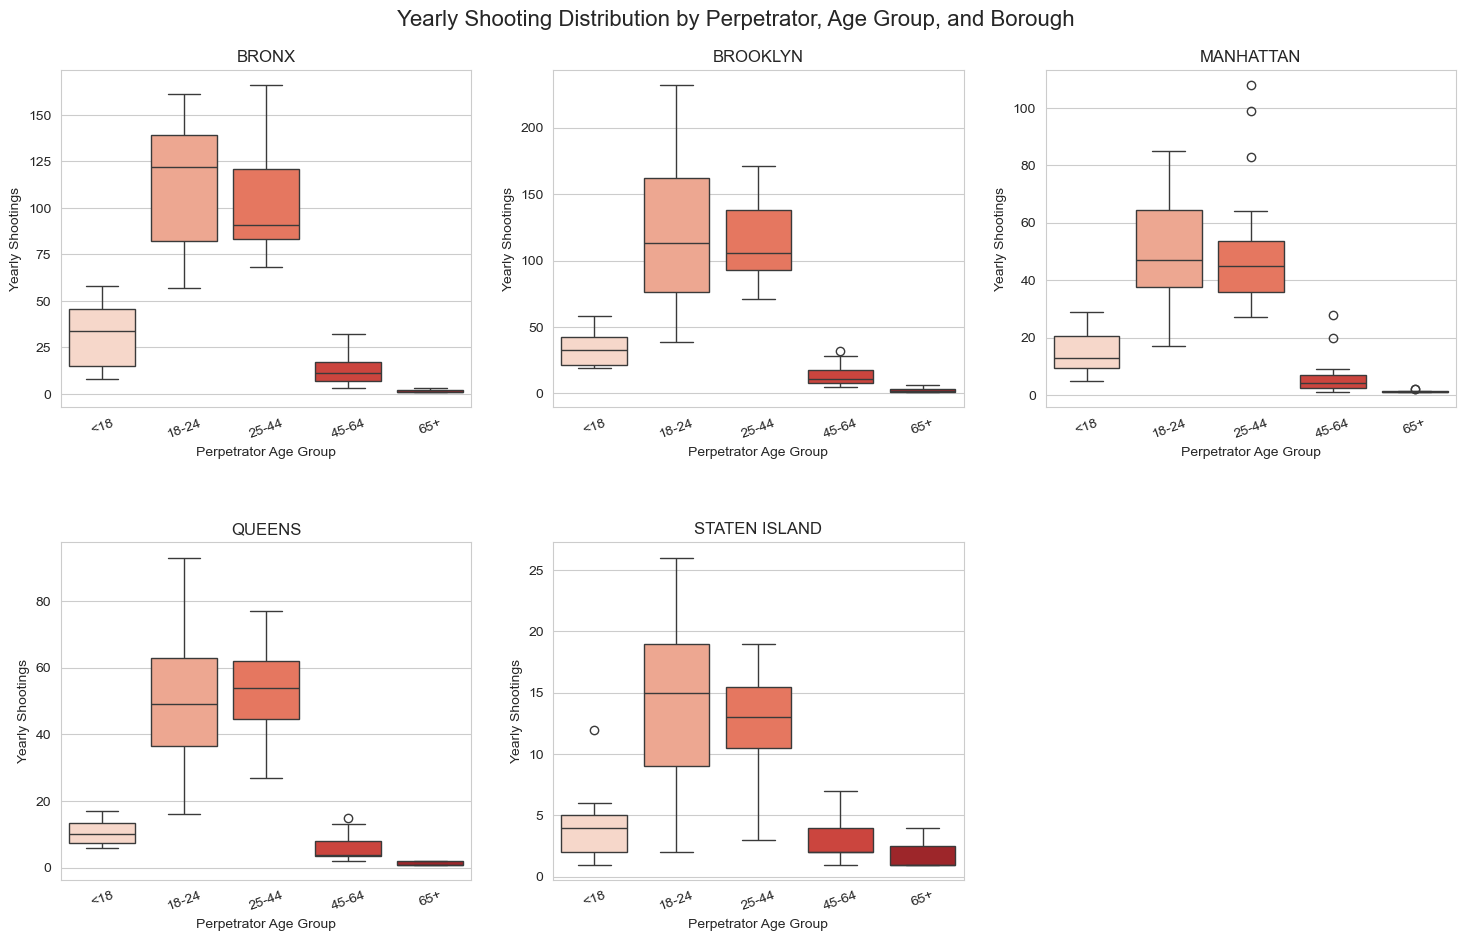

In [106]:
# Define valid age groups
age_order = ['<18', '18-24', '25-44', '45-64', '65+']

# Filter rows with valid perpetrator age and borough
df_filtered = df[df['PERP_AGE_GROUP'].isin(age_order) & df['BORO'].notna()]

# Extract year
df_filtered['OCCUR_YEAR'] = pd.to_datetime(df_filtered['OCCUR_DATE'], errors='coerce').dt.year

# Group by year, borough, and age group
grouped = (
    df_filtered.groupby(['BORO', 'PERP_AGE_GROUP', 'OCCUR_YEAR'])
    .size()
    .reset_index(name='Shootings')
    .rename(columns={'BORO': 'Borough', 'PERP_AGE_GROUP': 'Age Group', 'OCCUR_YEAR': 'Year'})
)

# Plotting
sns.set_style("whitegrid")
boroughs = grouped['Borough'].unique()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, borough in enumerate(boroughs):
    ax = axes[i]
    sns.boxplot(
        data=grouped[grouped['Borough'] == borough],
        x='Age Group',
        y='Shootings',
        order=age_order,
        palette='Reds',
        ax=ax
    )
    ax.set_title(borough)
    ax.set_xlabel("Perpetrator Age Group")
    ax.set_ylabel("Yearly Shootings")
    ax.tick_params(axis='x', rotation=20)

# Remove unused axes
for j in range(len(boroughs), len(axes)):
    fig.delaxes(axes[j])

plt.subplots_adjust(top=0.92, hspace=0.4)
fig.suptitle("Yearly Shooting Distribution by Perpetrator, Age Group, and Borough", fontsize=16)
plt.show()

 

   


### Figure 11

C:\Users\Tinna\AppData\Local\Temp\ipykernel_17444\3516769250.py:13: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\Tinna\AppData\Local\Temp\ipykernel_17444\3516769250.py:14: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

c:\Users\Tinna\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



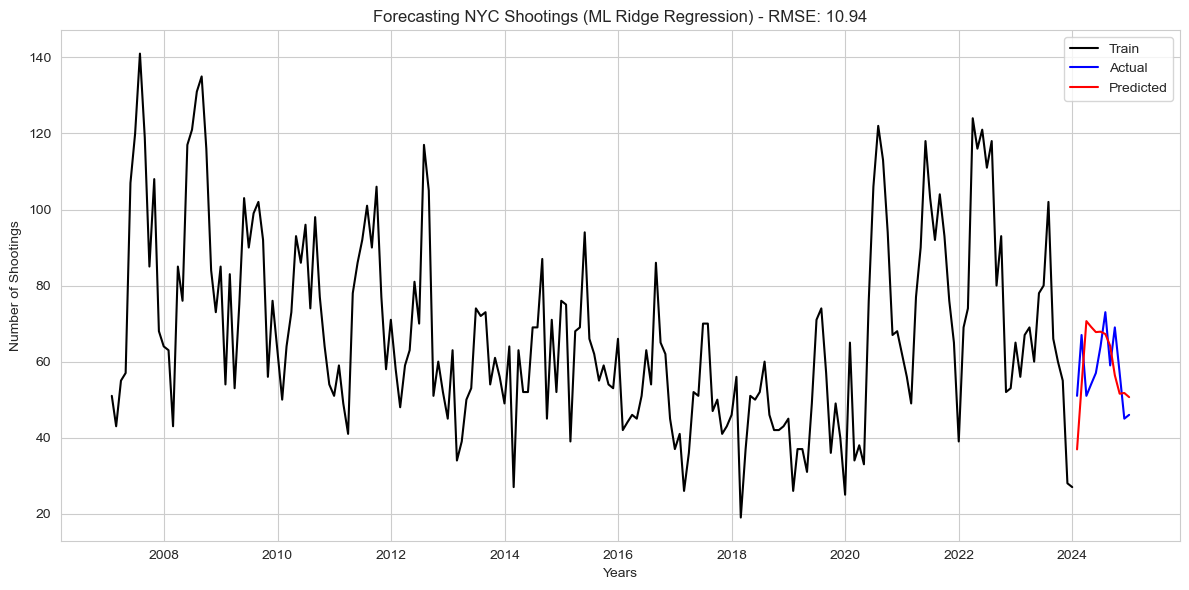

In [107]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# Preprocess dates
df['OCCUR_DATE'] = pd.to_datetime(df['OCCUR_DATE'], errors='coerce')
df = df.dropna(subset=['OCCUR_DATE'])

# Create monthly shooting counts
monthly = df.groupby(pd.Grouper(key='OCCUR_DATE', freq='M')).size().rename("shootings")
monthly = monthly.asfreq('M', fill_value=0)

# Create lag features
df_model = pd.DataFrame(monthly)
for lag in range(1, 13):  # 12 months of lag
    df_model[f'lag_{lag}'] = df_model['shootings'].shift(lag)

# Drop NA rows from lagging
df_model = df_model.dropna()

# Prepare training data
X = df_model.drop(columns=['shootings'])
y = df_model['shootings']

# Train/test split (last 12 months as test)
X_train, X_test = X[:-12], X[-12:]
y_train, y_test = y[:-12], y[-12:]

# Model: Ridge regression with scaling
model = make_pipeline(StandardScaler(), Ridge())
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train, label="Train", color='black')
plt.plot(y_test.index, y_test, label="Actual", color='blue')
plt.plot(y_test.index, y_pred, label="Predicted", color='red')
plt.title(f"Forecasting NYC Shootings (ML Ridge Regression) - RMSE: {rmse:.2f}")
plt.xlabel("Years")
plt.ylabel("Number of Shootings")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Figure 12

In [108]:
# Convert time and date columns
df['OCCUR_TIME'] = pd.to_datetime(df['OCCUR_TIME'], format="%H:%M:%S", errors='coerce')
df['HOUR'] = df['OCCUR_TIME'].dt.hour
df['OCCUR_DATE'] = pd.to_datetime(df['OCCUR_DATE'], errors='coerce')
df['YEAR'] = df['OCCUR_DATE'].dt.year

# Filter to male perpetrators under 45 with valid borough and hour
target_males = df[
    (df['PERP_SEX'] == 'M') &
    (df['PERP_AGE_GROUP'].isin(['18-24', '25-44'])) &
    (df['HOUR'].notna()) &
    (df['BORO'].notna())
]

# Group by hour and borough
grouped = target_males.groupby(['HOUR', 'BORO']).size().reset_index(name='Count')

# Create heatmap
fig = px.density_heatmap(
    grouped,
    x='BORO',
    y='HOUR',
    z='Count',
    color_continuous_scale='Reds',
    nbinsx=len(grouped['BORO'].unique()),
    nbinsy=24,
    title="When and Where Are Male Perpetrators Aged 18–44 Most Active?"
)

fig.update_layout(
    yaxis=dict(autorange="reversed"),
    xaxis_title="Borough",
    yaxis_title="Hour of Day",
    height=500
)

fig.show()
